<a href="https://colab.research.google.com/github/byeori-jang/Deep-learning/blob/main/%082025-10-28/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [12]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [13]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [14]:
# 4. Train/Test 분리 (80:20)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

In [15]:
# 5. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
# 6. 학습
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0394
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051
Epoch 16/50
32/32 ━

In [17]:
# 7. 테스트 데이터로 예측
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [18]:
# 8. MSE 계산
mse = mean_squared_error(y_test, pred)
print(f"📊 Test MSE: {mse:.6f}")

📊 Test MSE: 0.013952


In [19]:
# 9. MA(이동평균) 계산
df['MA_12'] = df['S4248SM144NCEN'].rolling(window=12, min_periods=1).mean()


In [20]:
# 10. 최근 이동평균값 출력
print("\n📈 최근 5개 MA(12개월 이동평균):")
print(df['MA_12'].tail())



📈 최근 5개 MA(12개월 이동평균):
320    12736.000000
321    12836.250000
322    12912.333333
323    13015.583333
324    13111.750000
Name: MA_12, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


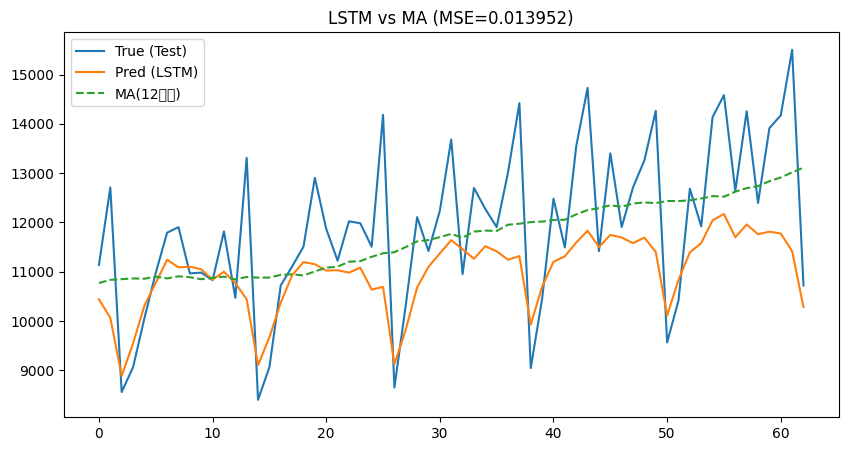

In [21]:
# 11. 시각화
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y_test), label='True (Test)')
plt.plot(scaler.inverse_transform(pred), label='Pred (LSTM)')
plt.plot(df['MA_12'].iloc[-len(y_test):].values, label='MA(12개월)', linestyle='--')
plt.legend()
plt.title(f"LSTM vs MA (MSE={mse:.6f})")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

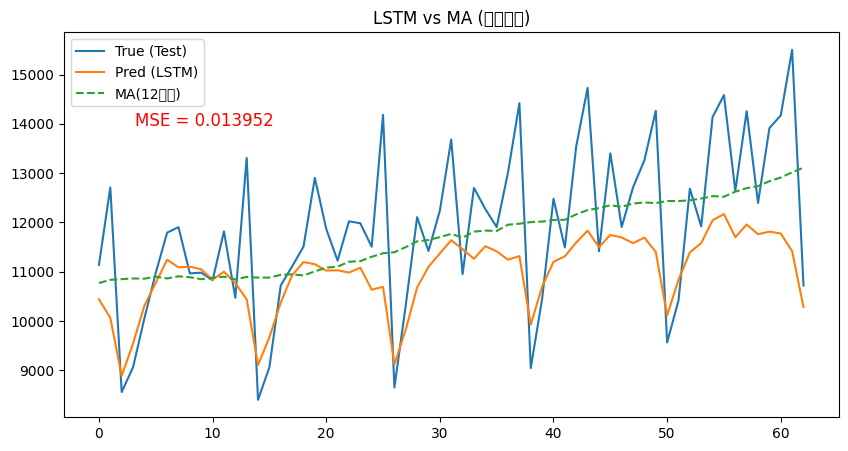

In [22]:
# 12. 시각화 (그래프 안에 MSE 표시)
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(y_test), label='True (Test)')
plt.plot(scaler.inverse_transform(pred), label='Pred (LSTM)')
plt.plot(df['MA_12'].iloc[-len(y_test):].values, label='MA(12개월)', linestyle='--')
plt.legend()
plt.title("LSTM vs MA (이동평균)")

# ✅ 그래프 내부에 MSE 텍스트 표시
plt.text(x=len(y_test)*0.05,
         y=max(scaler.inverse_transform(y_test))*0.9,
         s=f"MSE = {mse:.6f}",
         fontsize=12, color='red')

plt.show()
